# outlier detection and removal (after feature extraction)

In [107]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [108]:
df = pd.read_csv('/Users/anuragchaubey/RouteWise/data/processed/delivery_data_features.csv')
df.head()

,order_id,agent_age,agent_rating,weather,traffic,vehicle,area,delivery_time,category,order_hour,order_minute,order_dayofweek,is_weekend,is_peakhour,pickup_hour,pickup_minute,haversine_distance_km,order_to_pickup_min,delivery_speed_km_min
0,ialx566343618,37,4.9,Sunny,High,motorcycle,Urban,120,Clothing,11,30,5,1,0,11,45,3.025149,15.0,0.025210
1,akqg208421122,34,4.5,Stormy,Jam,scooter,Metropolitian,165,Electronics,19,45,4,0,1,19,50,20.183530,5.0,0.122324
2,njpu434582536,23,4.4,Sandstorms,Low,motorcycle,Urban,130,Sports,8,30,5,1,1,8,45,1.552758,15.0,0.011944
3,rjto796129700,38,4.7,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics,18,0,1,0,1,18,10,7.790401,10.0,0.074194
4,zguw716275638,32,4.6,Cloudy,High,scooter,Metropolitian,150,Toys,13,30,5,1,0,13,45,6.210138,15.0,0.041401


In [109]:
df.shape

(43594, 19)

In [110]:
df.isnull().sum()

order_id                 0
agent_age                0
agent_rating             0
weather                  0
traffic                  0
vehicle                  0
area                     0
delivery_time            0
category                 0
order_hour               0
order_minute             0
order_dayofweek          0
is_weekend               0
is_peakhour              0
pickup_hour              0
pickup_minute            0
haversine_distance_km    0
order_to_pickup_min      0
delivery_speed_km_min    0
dtype: int64

In [111]:
df.describe()

,agent_age,agent_rating,delivery_time,order_hour,order_minute,order_dayofweek,is_weekend,is_peakhour,pickup_hour,pickup_minute,haversine_distance_km,order_to_pickup_min,delivery_speed_km_min
count,43594.000000,43594.000000,43594.000000,43594.000000,43594.000000,43594.000000,43594.000000,43594.000000,43594.000000,43594.000000,43594.000000,43594.000000,43594.000000
mean,29.555719,4.635287,124.916433,17.424737,29.547529,3.000092,0.275451,0.292999,17.152498,28.621485,26.756143,-17.260403,0.281053
std,5.760689,0.313827,51.941975,4.818828,16.611268,1.969743,0.446746,0.455143,5.319094,17.557371,299.640228,196.015502,4.021750
min,20.000000,2.500000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.465067,-1435.000000,0.005653
25%,25.000000,4.500000,90.000000,15.000000,15.000000,1.000000,0.000000,0.000000,14.000000,15.000000,4.663432,5.000000,0.044123
50%,30.000000,4.700000,125.000000,19.000000,30.000000,3.000000,0.000000,0.000000,19.000000,30.000000,9.220419,10.000000,0.072432
75%,35.000000,4.900000,160.000000,21.000000,45.000000,5.000000,1.000000,1.000000,21.000000,45.000000,13.682165,15.000000,0.113923
max,39.000000,5.000000,270.000000,23.000000,55.000000,6.000000,1.000000,1.000000,23.000000,55.000000,6884.726399,15.000000,375.245832


In [112]:
# no unexpected values in categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"{col}: {df[col].unique()}")

order_id: ['ialx566343618' 'akqg208421122' 'njpu434582536' ... 'xnek760674819'
 'cynl434665991' 'nsyz997960170']
weather: ['Sunny' 'Stormy' 'Sandstorms' 'Cloudy' 'Fog' 'Windy']
traffic: ['High ' 'Jam ' 'Low ' 'Medium ']
vehicle: ['motorcycle ' 'scooter ' 'van']
area: ['Urban ' 'Metropolitian ' 'Semi-Urban ' 'Other']
category: ['Clothing' 'Electronics' 'Sports' 'Cosmetics' 'Toys' 'Snacks' 'Shoes'
 'Apparel' 'Jewelry' 'Outdoors' 'Grocery' 'Books' 'Kitchen' 'Home'
 'Pet Supplies' 'Skincare']


In [113]:
df['order_dayofweek'].nunique()

7

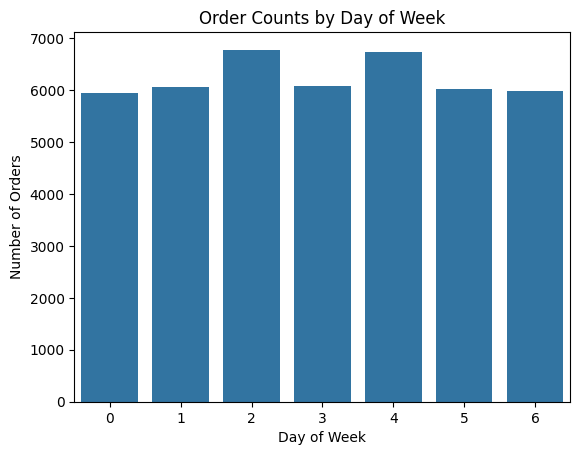

In [114]:
sns.countplot(x='order_dayofweek', data=df)
plt.title('Order Counts by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Orders')
plt.show()

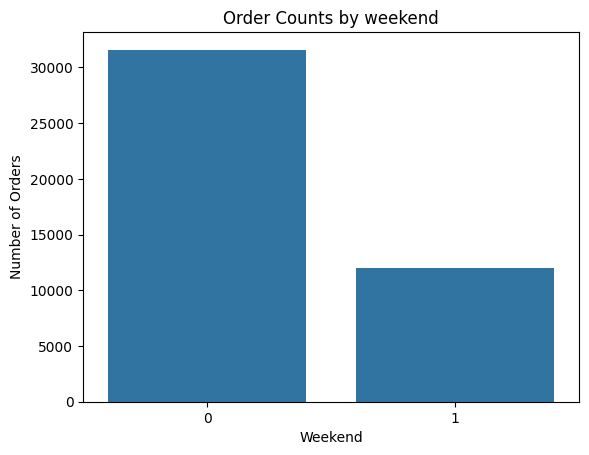

In [115]:
sns.countplot(x='is_weekend', data=df)
plt.title('Order Counts by weekend')
plt.xlabel('Weekend')
plt.ylabel('Number of Orders')
plt.show()

## outlier detection column wise

### agent_age column

In [116]:
df['agent_age'].describe()

count    43594.000000
mean        29.555719
std          5.760689
min         20.000000
25%         25.000000
50%         30.000000
75%         35.000000
max         39.000000
Name: agent_age, dtype: float64

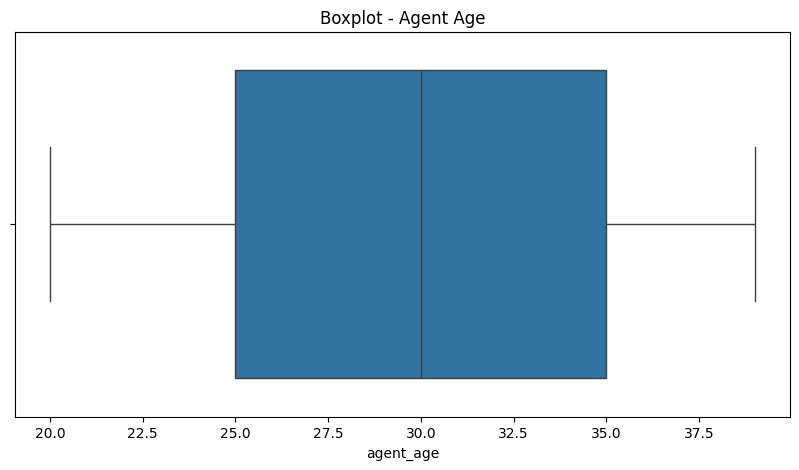

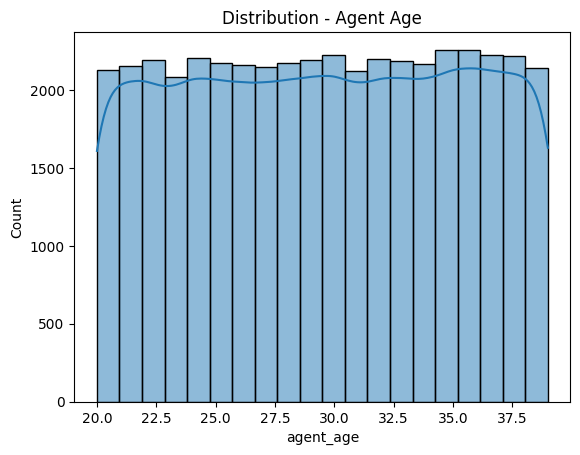

In [117]:
# agent age visualization
plt.figure(figsize=(10,5))
sns.boxplot(x=df['agent_age'])
plt.title('Boxplot - Agent Age')
plt.show()

# Histogram
sns.histplot(df['agent_age'], kde=True, bins=20)
plt.title('Distribution - Agent Age')
plt.show()

In [118]:
# Outlier detection for agent_age
out_of_range_count = df[(df['agent_age'] < 18) | (df['agent_age'] > 50)].shape[0]
print(f"Number of agent_age values not between 18 and 50: {out_of_range_count}")

Number of agent_age values not between 18 and 50: 0


In [120]:
# Remove rows where agent_age is outside the [lower_bound, upper_bound] range
df_cleaned = df[(df['agent_age'] >= 18) & (df['agent_age'] <= 50)].copy()

### agent_rating column

In [122]:
df_cleaned['agent_rating'].describe()

count    43594.000000
mean         4.635287
std          0.313827
min          2.500000
25%          4.500000
50%          4.700000
75%          4.900000
max          5.000000
Name: agent_rating, dtype: float64

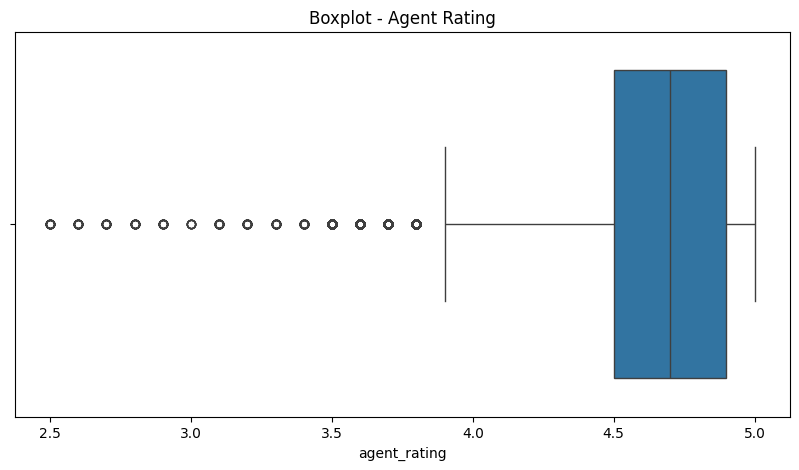

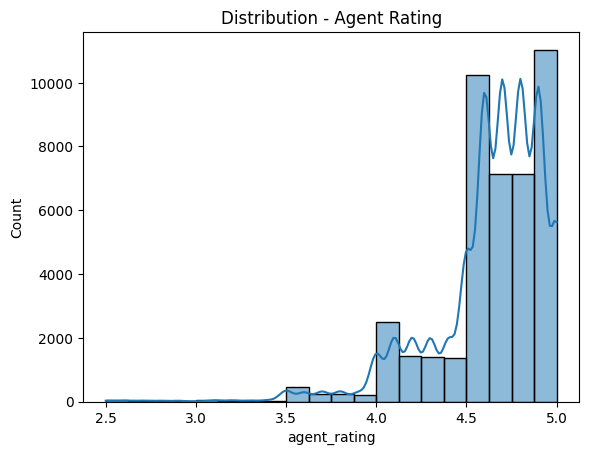

In [123]:
# visualization of agent_rating
plt.figure(figsize=(10,5))
sns.boxplot(x=df_cleaned['agent_rating'])
plt.title('Boxplot - Agent Rating')
plt.show()

sns.histplot(df_cleaned['agent_rating'], kde=True, bins=20)
plt.title('Distribution - Agent Rating')
plt.show()

In [124]:
# min and max of agent_rating
print("Min rating:", df_cleaned['agent_rating'].min())
print("Max rating:", df_cleaned['agent_rating'].max())

Min rating: 2.5
Max rating: 5.0


In [125]:
# Keep only valid ratings between 1 and 5
df_cleaned = df_cleaned[(df_cleaned['agent_rating'] >= 1.0) & (df_cleaned['agent_rating'] <= 5.0)]

### haversine_distance_km column

In [126]:
df_cleaned['haversine_distance_km'].describe()

count    43594.000000
mean        26.756143
std        299.640228
min          1.465067
25%          4.663432
50%          9.220419
75%         13.682165
max       6884.726399
Name: haversine_distance_km, dtype: float64

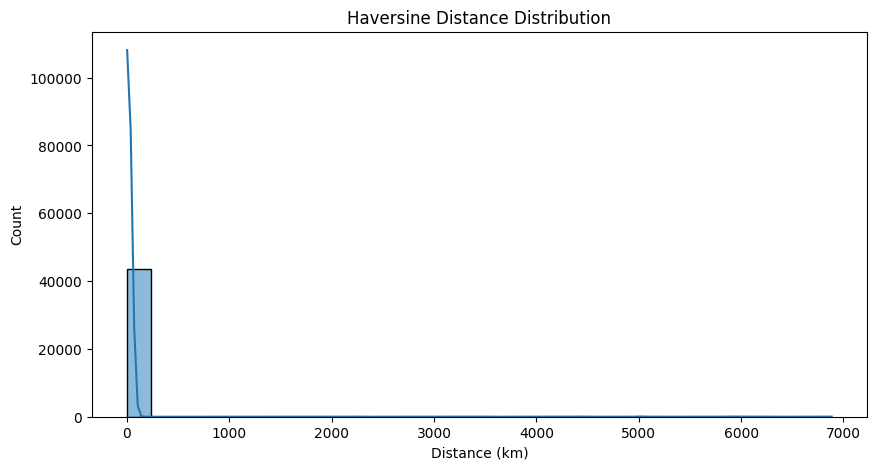

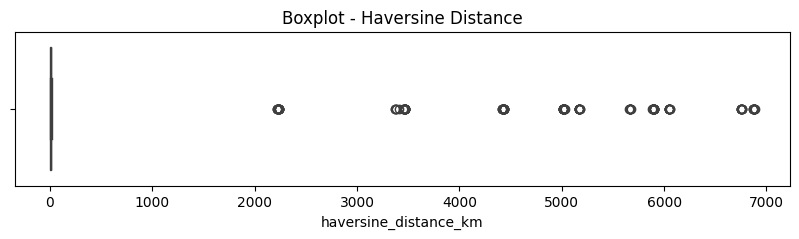

In [127]:
# Visualization of haversine_distance_km

# Histogram
plt.figure(figsize=(10, 5))
sns.histplot(df_cleaned['haversine_distance_km'], bins=30, kde=True)
plt.title('Haversine Distance Distribution')
plt.xlabel('Distance (km)')
plt.show()

# Boxplot
plt.figure(figsize=(10, 2))
sns.boxplot(x=df_cleaned['haversine_distance_km'])
plt.title('Boxplot - Haversine Distance')
plt.show()

In [128]:
# count of rows with haversine_distance_km == 0
zero_distance_count = (df_cleaned['haversine_distance_km'] == 0).sum()
print(f"Number of rows with haversine_distance_km == 0: {zero_distance_count}")

Number of rows with haversine_distance_km == 0: 0


In [129]:
# outlier detection using IQR method
Q1 = df_cleaned['haversine_distance_km'].quantile(0.25)
Q3 = df_cleaned['haversine_distance_km'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower bound: {lower_bound:.2f}, Upper bound: {upper_bound:.2f}")


Lower bound: -8.86, Upper bound: 27.21


In [130]:
df_cleaned = df_cleaned[
    (df_cleaned['haversine_distance_km'] >= lower_bound) &
    (df_cleaned['haversine_distance_km'] <= upper_bound)
]

print(" Outliers removed from haversine_distance_km.")
print(f"Remaining rows: {df_cleaned.shape[0]}")


 Outliers removed from haversine_distance_km.
Remaining rows: 43443


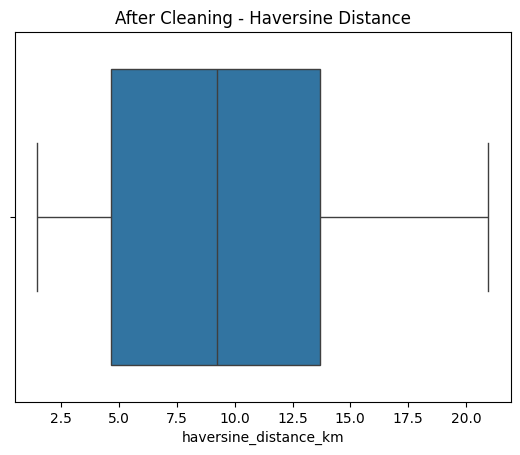

In [131]:
# recheck after outlier removal
sns.boxplot(x=df_cleaned['haversine_distance_km'])
plt.title('After Cleaning - Haversine Distance')
plt.show()

### delivery_time column (target column)

In [132]:
df_cleaned['delivery_time'].describe()

count    43443.000000
mean       124.935341
std         51.955059
min         10.000000
25%         90.000000
50%        125.000000
75%        160.000000
max        270.000000
Name: delivery_time, dtype: float64

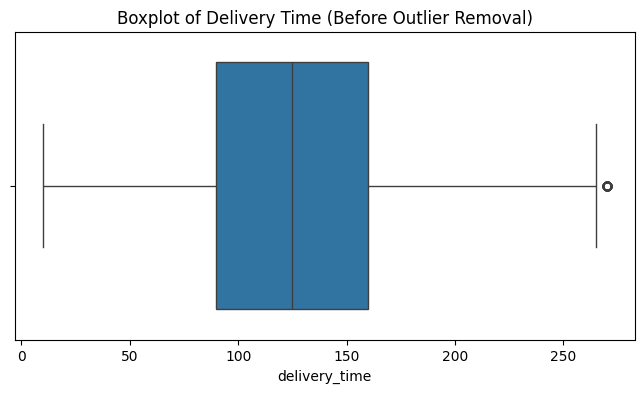

In [133]:
# Visualization of delivery_time
plt.figure(figsize=(8, 4))
sns.boxplot(x=df_cleaned['delivery_time'])
plt.title("Boxplot of Delivery Time (Before Outlier Removal)")
plt.show()

In [134]:
# Outlier detection using IQR method for delivery_time
Q1 = df_cleaned['delivery_time'].quantile(0.25)
Q3 = df_cleaned['delivery_time'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower Bound: {lower_bound:.2f}")
print(f"Upper Bound: {upper_bound:.2f}")

# Remove outliers
df_cleaned = df_cleaned[
    (df_cleaned['delivery_time'] >= lower_bound) &
    (df_cleaned['delivery_time'] <= upper_bound)
]

print(" Outliers removed from delivery_time.")
print(f"Remaining rows: {df_cleaned.shape[0]}")

Lower Bound: -15.00
Upper Bound: 265.00
 Outliers removed from delivery_time.
Remaining rows: 43364


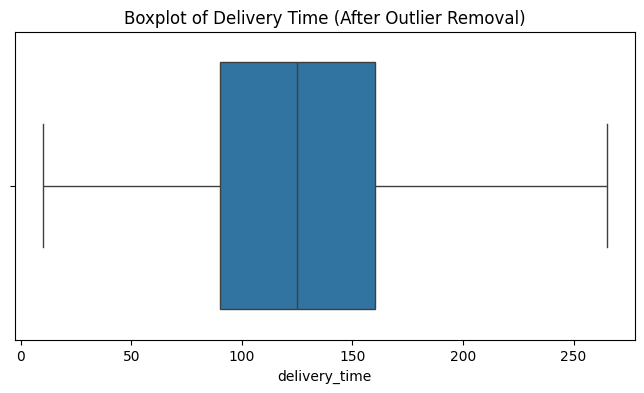

In [135]:
# recheck after outlier removal
plt.figure(figsize=(8, 4))
sns.boxplot(x=df_cleaned['delivery_time'])
plt.title("Boxplot of Delivery Time (After Outlier Removal)")
plt.show()

### order_to_pickup_min column

In [136]:
df_cleaned['order_to_pickup_min'].describe()

count    43364.000000
mean       -17.335924
std        196.290499
min      -1435.000000
25%          5.000000
50%         10.000000
75%         15.000000
max         15.000000
Name: order_to_pickup_min, dtype: float64

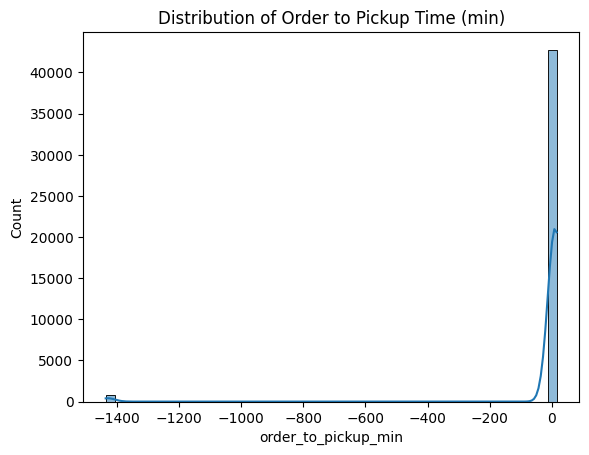

In [137]:
# Visualization of order_to_pickup_min
sns.histplot(df['order_to_pickup_min'], bins=50, kde=True)
plt.title("Distribution of Order to Pickup Time (min)")
plt.show()



In [138]:
Q1 = df_cleaned['order_to_pickup_min'].quantile(0.25)
Q3 = df_cleaned['order_to_pickup_min'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"IQR Range: {lower_bound:.2f} to {upper_bound:.2f}")

# Filter outliers
df_cleaned = df_cleaned[
    (df_cleaned['order_to_pickup_min'] >= lower_bound) &
    (df_cleaned['order_to_pickup_min'] <= upper_bound)
]

print("Outliers removed from order_to_pickup_min.")
print(f"Remaining rows: {df_cleaned.shape[0]}")


IQR Range: -10.00 to 30.00
Outliers removed from order_to_pickup_min.
Remaining rows: 42541


### delivery_speed_km_min column

In [139]:
df_cleaned['delivery_speed_km_min'].describe()

count    42541.000000
mean         0.098090
std          0.110571
min          0.005653
25%          0.043380
50%          0.071635
75%          0.112528
max          1.997515
Name: delivery_speed_km_min, dtype: float64

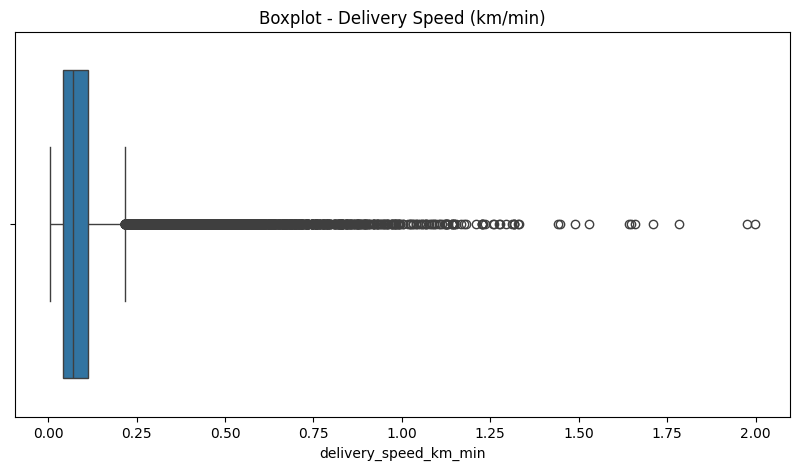

In [140]:
# visualization of delivery_speed_km_min
plt.figure(figsize=(10, 5))
sns.boxplot(x=df_cleaned['delivery_speed_km_min'])
plt.title("Boxplot - Delivery Speed (km/min)")
plt.show()

In [141]:
zero_speed_count = (df_cleaned['delivery_speed_km_min'] == 0).sum()
print(f"Number of rows with delivery_speed_km_min == 0: {zero_speed_count}")

Number of rows with delivery_speed_km_min == 0: 0


In [142]:
df_cleaned = df_cleaned[
    (df_cleaned['delivery_speed_km_min'] >= 0.01) & 
    (df_cleaned['delivery_speed_km_min'] <= 2.0)
]

In [143]:
df_cleaned.shape

(42198, 19)

In [144]:
df_cleaned.dtypes

order_id                  object
agent_age                  int64
agent_rating             float64
weather                   object
traffic                   object
vehicle                   object
area                      object
delivery_time              int64
category                  object
order_hour                 int64
order_minute               int64
order_dayofweek            int64
is_weekend                 int64
is_peakhour                int64
pickup_hour                int64
pickup_minute              int64
haversine_distance_km    float64
order_to_pickup_min      float64
delivery_speed_km_min    float64
dtype: object

In [145]:
df_cleaned.isnull().sum()

order_id                 0
agent_age                0
agent_rating             0
weather                  0
traffic                  0
vehicle                  0
area                     0
delivery_time            0
category                 0
order_hour               0
order_minute             0
order_dayofweek          0
is_weekend               0
is_peakhour              0
pickup_hour              0
pickup_minute            0
haversine_distance_km    0
order_to_pickup_min      0
delivery_speed_km_min    0
dtype: int64

In [146]:
df_cleaned.to_csv('/Users/anuragchaubey/RouteWise/data/processed/outlier_removal_manual.csv', index=False)